In [1]:
import numpy as np
from matplotlib import pyplot as plt
import nltk
%matplotlib inline

Writing bleu.py


In [1]:
!ls logs

ce_result_25kvocab160kit600decrnn.npy
ce_result_25kvocab160kit.npy
kld_result_npy_25kvocab160kit600decrnn.npy
kld_result_npy_25kvocab160kit.npy


In [3]:
kld = np.load('logs/kld_result_npy_25kvocab160kit600decrnn.npy')
ce = np.load('logs/ce_result_25kvocab160kit600decrnn.npy')

(0, 100)

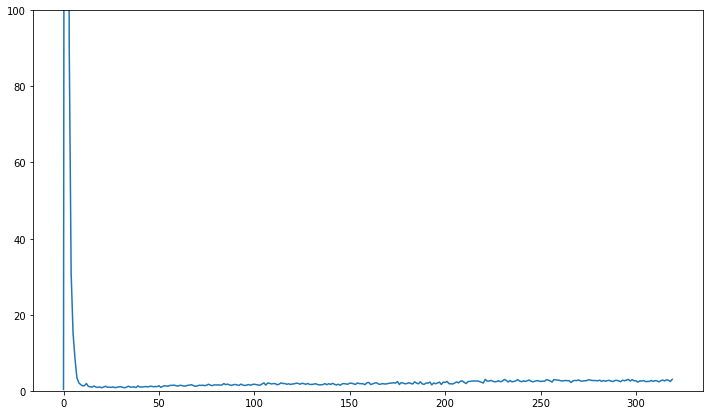

In [4]:
X = np.arange(kld.shape[0])
plt.figure(figsize=(12,7))
plt.plot(X, kld)
plt.ylim((0,100))

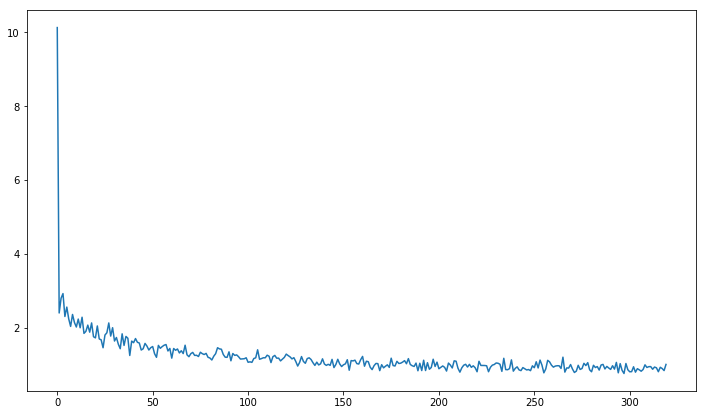

In [5]:
X = np.arange(ce.shape[0])
plt.figure(figsize=(12,7))
plt.plot(X, ce)

In [2]:
!ls logs

ce_result_25kvocab160kit600decrnn.npy
ce_result_25kvocab160kit.npy
ce_result_snli_quora_160k.npy
ce_result_snli_quora_200k_800rnn.npy
ce_result_train_interm_snli_250kit_600_800.npy
ce_result_train_mscoco_300kit_600_800.npy
ce_result_train_quora_coco_200kit_600_600.npy
ce_result_train_quora_coco_250k800_800.npy
ce_result_train_quora_coco_250kit_600_800.npy
ce_result_train_quoraonly120kit600decrnn.npy
ce_result_train_snli_200k600_600.npy
ce_result_train_snli_200kit_600_800.npy
ce_result_train_snli_coco_250kit_600_800.npy
ce_result_train_snli_coco_250kit_800_800.npy
ce_result_train_snli_quora_150k_600rnn.npy
ce_result_train_snli_quora_250k_600_800rnn.npy
ce_result_train_snli_quora_250k800_1100.npy
ce_result_train_snli_quora_250kit_600_600.npy
ce_result_train_snli_quora_250kit_600_800.npy
ce_result_train_snli_quora_wd_01_200k800_800.npy
ce_result_valid_interm_snli_250kit_600_800.npy
ce_result_valid_mscoco_300kit_600_800.npy
ce_result_valid_quora_coco_200kit_600_600.npy
ce_result_valid_quor

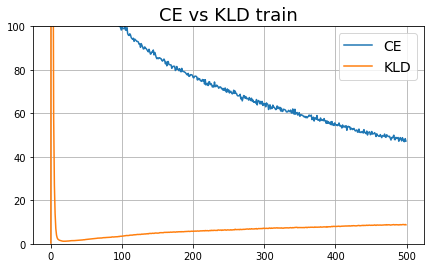

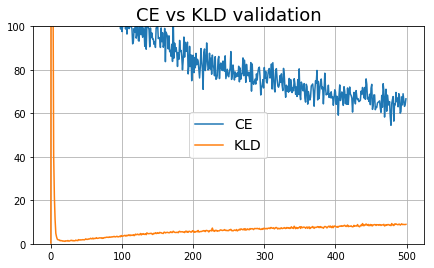

In [16]:
CE_COEF = 79.0
def plot_ce_kld(ce_file, kld_file, time='train'):
    ce = np.load(ce_file)
    kld = np.load(kld_file)
    X = np.arange(ce.shape[0])
    plt.figure(figsize=(7,4))
    plt.grid(True)
    plt.title('CE vs KLD '+ time, fontsize=18)
    plt.plot(X, CE_COEF * ce, label='CE')
    plt.plot(X, kld, label='KLD')
    plt.legend(loc='best', fontsize=14)
    plt.ylim((0,100))
    plt.show()

ce_file = 'logs/ce_result_train_snli_quora_250kit_600_800.npy'
kld_file = 'logs/kld_result_train_snli_quora_250kit_600_800.npy'
plot_ce_kld(ce_file, kld_file)

ce_file = 'logs/ce_result_valid_snli_quora_250kit_600_800.npy'
kld_file = 'logs/kld_result_valid_snli_quora_250kit_600_800.npy'
plot_ce_kld(ce_file, kld_file, 'validation')

In [10]:
np.min(ce[-100:])

0.75627357

In [70]:
DATASETS = ['snli_test', 'quora_test', 'mscoco_test', 'snips']
def build_ce_plot(model_name, need_bleu=False, old_version=False, logs=None):
    if old_version:
        valid = np.load('logs/ce_result_{}.npy'.format(model_name))
    else:
        train = np.load('logs/ce_result_train_{}.npy'.format(model_name))
        valid = np.load('logs/ce_result_valid_{}.npy'.format(model_name))
    X = np.arange(valid.shape[0])
    plt.figure(figsize=(12,7))
    plt.grid(True)
    if not old_version:
        plt.plot(X, train, color='red', label='train')
    plt.plot(X, valid, color='green', label='validation')
    plt.ylim([0,3])
    plt.legend(loc='best')
    plt.show()
    if old_version:
        print(np.mean(valid[-20:]))
    else:
        print(np.mean(train[-20:]), np.mean(valid[-20:]))
    if need_bleu:
        bleu = get_bleu(model_name, logs)
        print('BLEU:')
        for i, ds in enumerate(DATASETS):
            print('{} : {}'.format(ds, bleu[i]))

from nltk.translate.bleu_score import corpus_bleu, sentence_bleu
def get_bleu(model_name, logs=None):
    if not logs is None:
        model_name = logs
    result = []
    for dataset in DATASETS:
        target = np.load('logs/target_out_{}_{}.txt.npy'.format(dataset, model_name))
        sampled = np.load('logs/sampled_out_{}_{}.txt.npy'.format(dataset, model_name))

        hypotheses = [s.split() for s in sampled]
        list_of_references = [[t] for t in target]
        
        nltk_version = corpus_bleu(list_of_references=list_of_references, hypotheses=hypotheses)
        deeppavlov_version = bleu.compute_bleu(list_of_references, hypotheses)[0]
        
        result.append((nltk_version, deeppavlov_version))
    return result

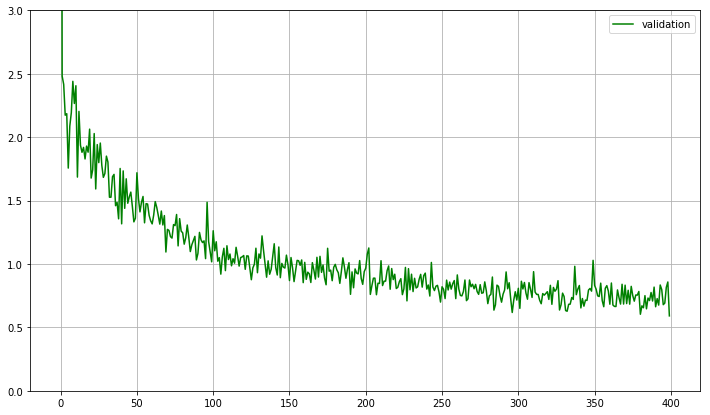

0.72000104
BLEU: 0.34492260761445054


In [55]:
build_ce_plot('snli_quora_200k_800rnn', old_version=True,  need_bleu=True, logs='likely_snli_quora_200k_800rnn')

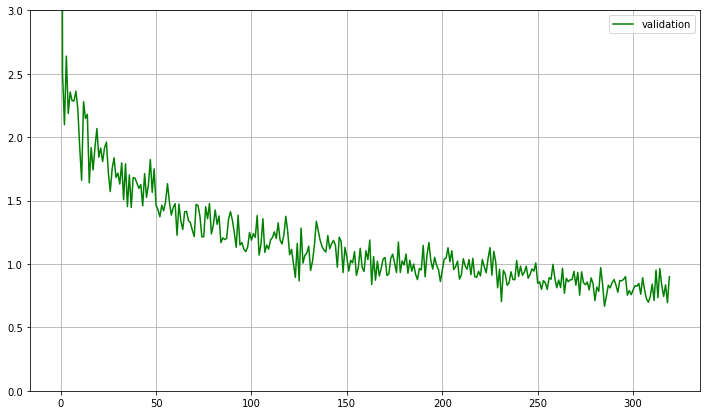

0.8060557


In [52]:
build_ce_plot('snli_quora_160k', old_version=True)

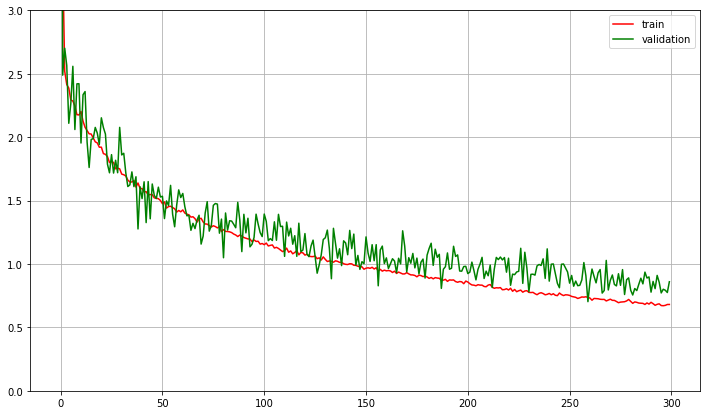

0.6862521 0.8324913
BLEU: 0.29395457639529404


In [57]:
build_ce_plot('snli_quora_150k_600rnn',  need_bleu=True)

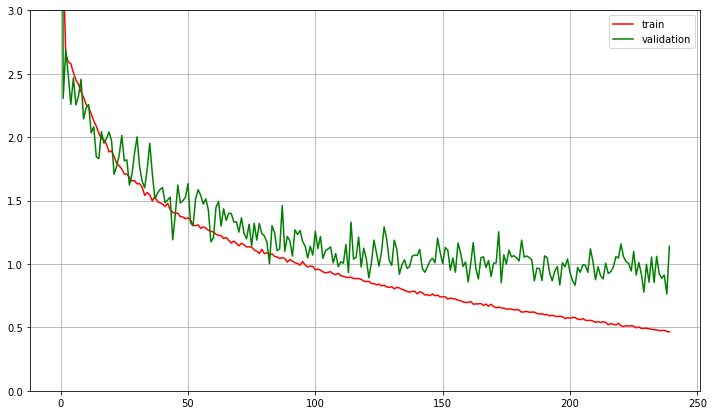

0.49189228 0.9676285
BLEU: 0.2955337574640947


In [58]:
build_ce_plot('quoraonly120kit600decrnn', need_bleu=True) # 800 - 800

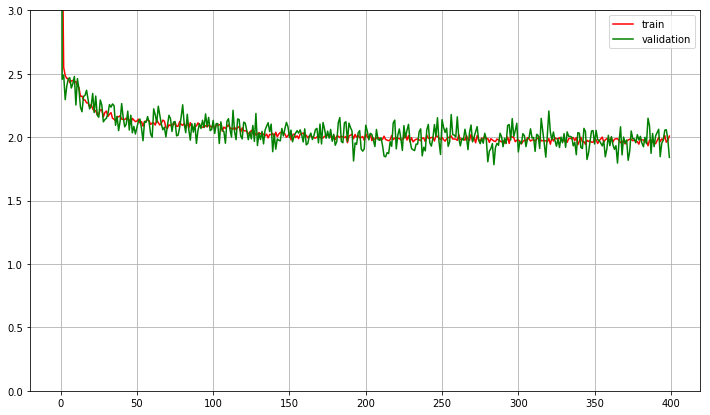

1.9735352 1.9853957


In [36]:
build_ce_plot('snli_quora_wd_01_200k800_800') # 800 - 800

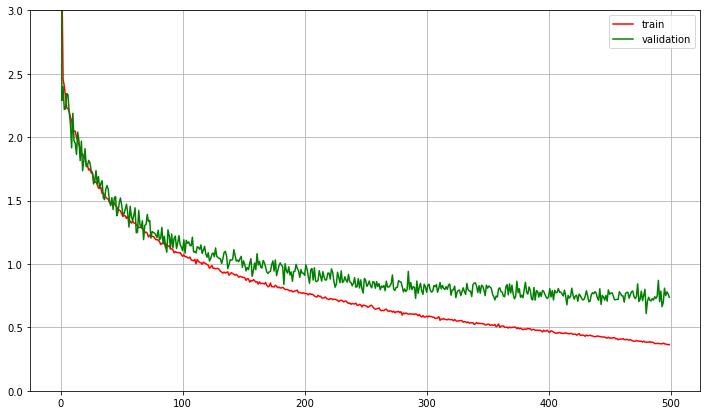

0.37483498 0.734522
BLEU: 0.3366883062951258


In [47]:
build_ce_plot('snli_quora_250k_600_800rnn', need_bleu=True)

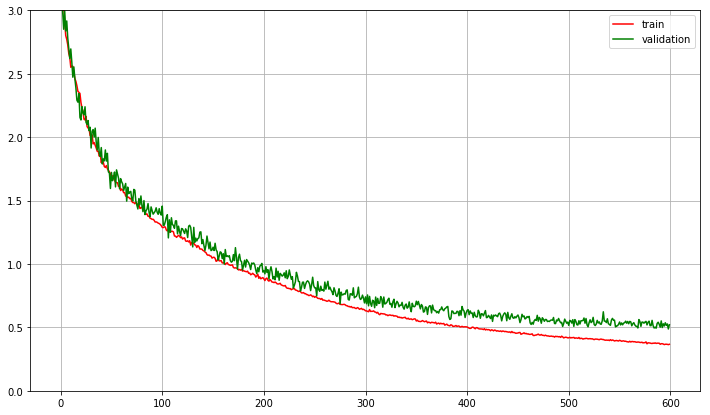

0.37125534 0.5179926


In [59]:
build_ce_plot('mscoco_300kit_600_800')  

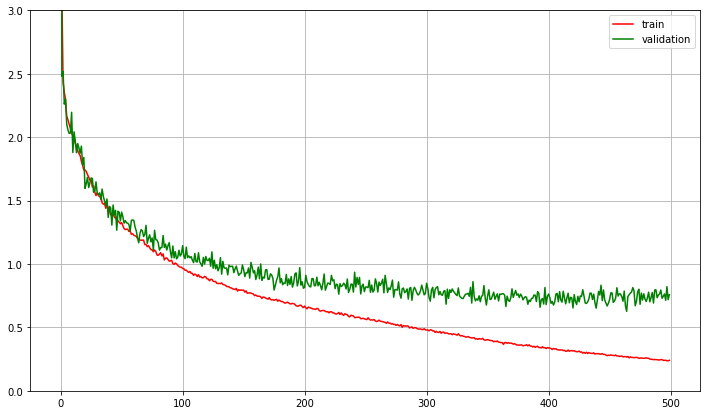

0.24584314 0.7502717
BLEU: 0.34931982519358146


In [60]:
build_ce_plot('snli_quora_250k800_1100', need_bleu=True)

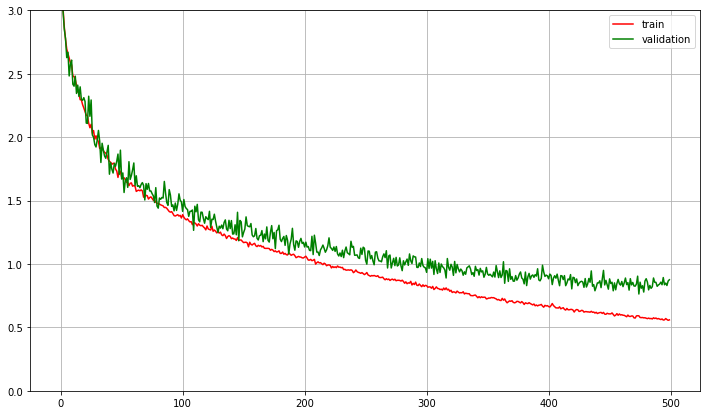

0.56666386 0.84680206
BLEU: 0.35977854040897983


In [62]:
build_ce_plot('quora_coco_250kit_600_800', need_bleu=True)

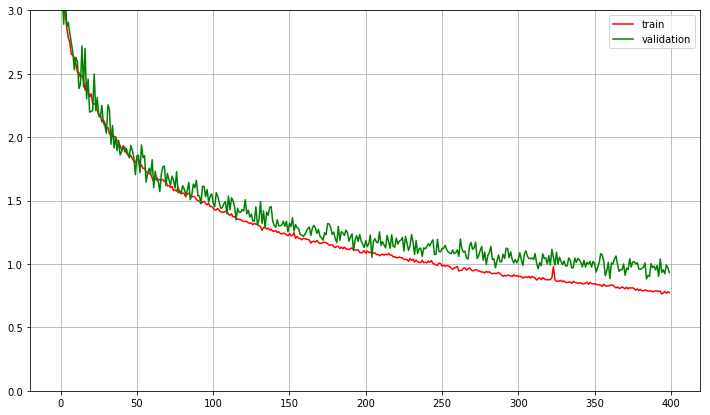

0.7836236 0.95698154
BLEU: 0.3275098509152493


In [64]:
build_ce_plot('quora_coco_200kit_600_600', need_bleu=True)

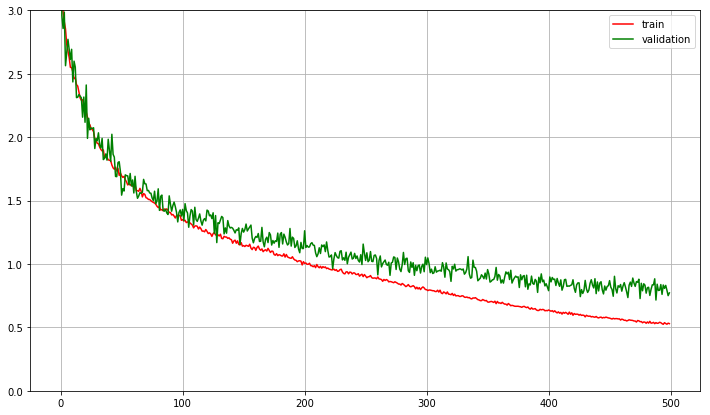

0.5341209 0.80148494
BLEU: 0.36532540141564973


In [65]:
build_ce_plot('quora_coco_250k800_800', need_bleu=True)

# New version >> 

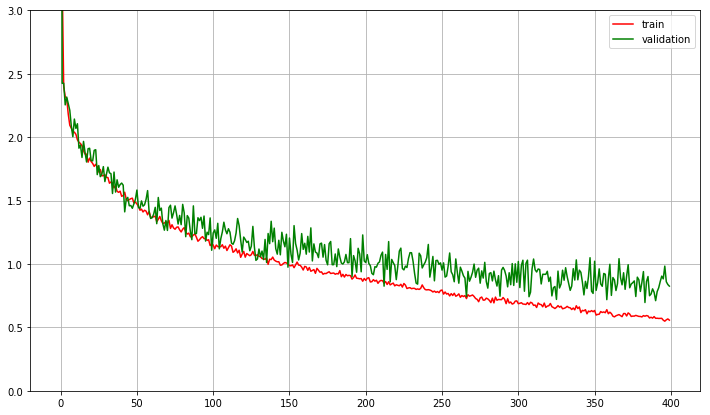

0.5744804 0.8293521
BLEU:
snli_test : (0.3389259024280228, 0.34073390015772637)
quora_test : (0.004575395486582512, 0.004576065966562084)
mscoco_test : (0.14998367607556218, 0.14998456634754662)
snips : (0.0037995644971933838, 0.003802500966386673)


In [71]:
build_ce_plot('snli_200kit_600_800', need_bleu=True)

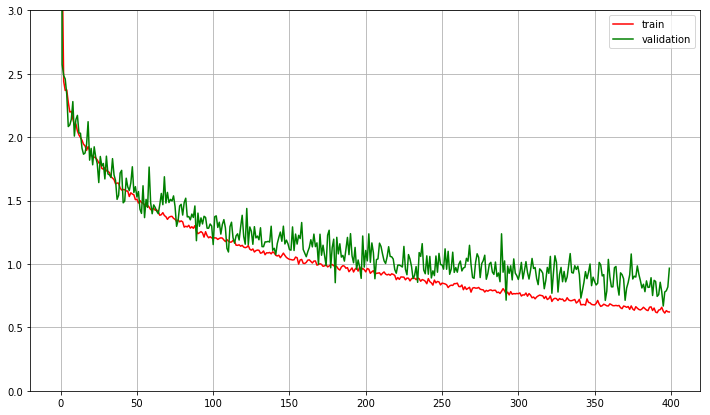

0.63761145 0.8168772
BLEU:
snli_test : (0.3155651495177461, 0.3164580868439155)
quora_test : (0.004698998149510404, 0.004699455428432664)
mscoco_test : (0.14712419541697053, 0.14712419541697053)
snips : (0.006697013803433943, 0.006701024835486555)


In [72]:
build_ce_plot('snli_200k600_600', need_bleu=True)

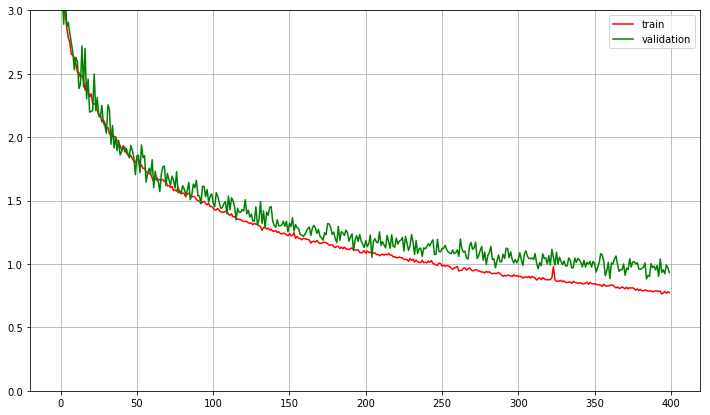

0.7836236 0.95698154
BLEU:
snli_test : (0.1314971668345536, 0.13171000032672814)
quora_test : (0.32767539894338804, 0.32768309817385766)
mscoco_test : (0.19899288914502425, 0.19899288914502425)
snips : (0.010146416500797527, 0.010148561891470849)


In [73]:
build_ce_plot('quora_coco_200kit_600_600', need_bleu=True)

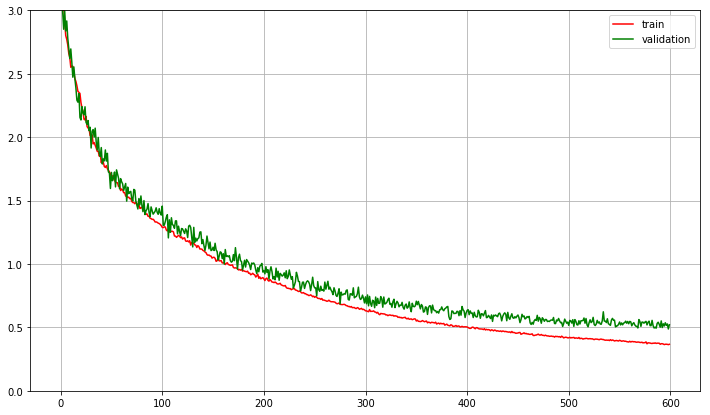

0.37125534 0.5179926
BLEU:
snli_test : (0.11254195343900723, 0.11256277071663212)
quora_test : (0.007989185850840004, 0.007989227925427842)
mscoco_test : (0.39726447178315405, 0.39726447178315405)
snips : (0.005599412718255078, 0.005599633288942272)


In [74]:
build_ce_plot('mscoco_300kit_600_800', need_bleu=True)

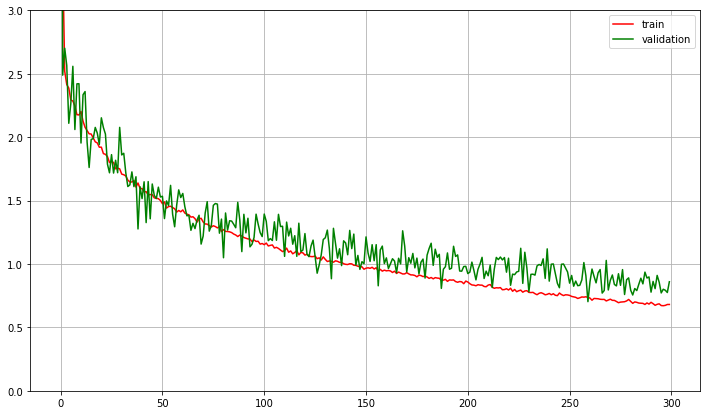

0.6862521 0.8324913
BLEU:
snli_test : (0.1951200765185409, 0.1952173025462195)
quora_test : (0.30262048386540574, 0.3026408032838574)
mscoco_test : (0.08022231810800656, 0.08022497757299789)
snips : (0.011385114609628825, 0.011385904036189404)


In [75]:
build_ce_plot('snli_quora_150k_600rnn', need_bleu=True)

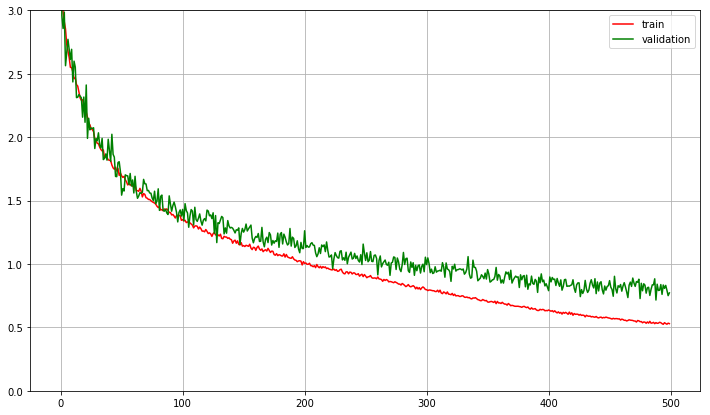

0.5341209 0.80148494
BLEU:
snli_test : (0.14718571936210834, 0.14729270981970555)
quora_test : (0.36627652437317343, 0.366282846152599)
mscoco_test : (0.2717137905129457, 0.2717137905129457)
snips : (0.010977108645485895, 0.010977495670562526)


In [76]:
build_ce_plot('quora_coco_250k800_800', need_bleu=True)

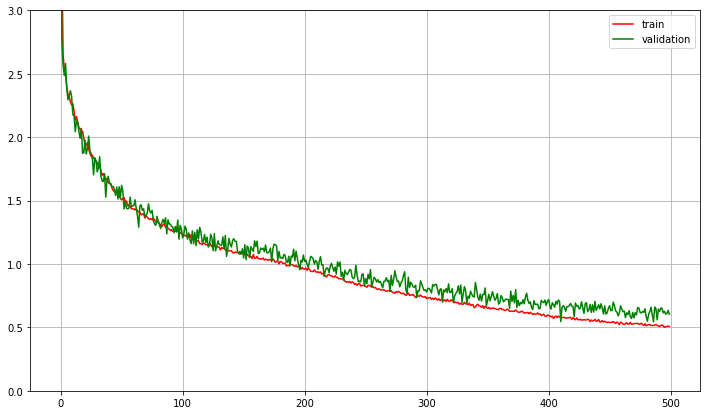

0.51340973 0.61467874
BLEU:
snli_test : (0.21011111088834955, 0.21031201977203132)
quora_test : (0.009109901027359429, 0.00910994953963023)
mscoco_test : (0.3602979412712442, 0.3602979412712442)
snips : (0.00628519762230134, 0.006285548381613051)


In [77]:
build_ce_plot('snli_coco_250kit_800_800', need_bleu=True)

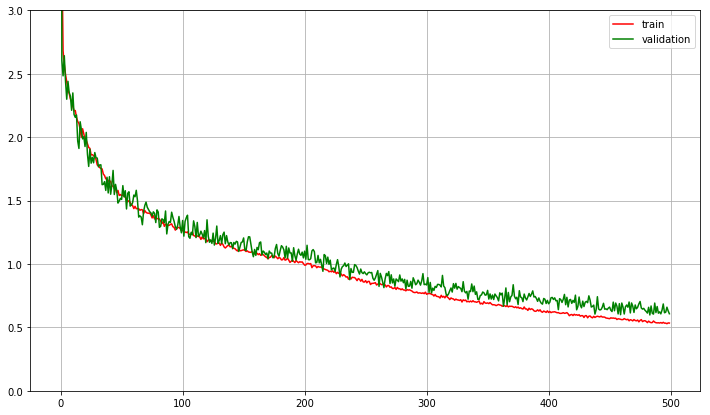

0.53806317 0.63224936
BLEU:
snli_test : (0.17327768549373568, 0.17344266776144882)
quora_test : (0.00844474302245778, 0.008445145874589333)
mscoco_test : (0.334753196539553, 0.334753196539553)
snips : (0.00549416740571361, 0.005495553192972711)


In [78]:
build_ce_plot('snli_coco_250kit_600_800', need_bleu=True)

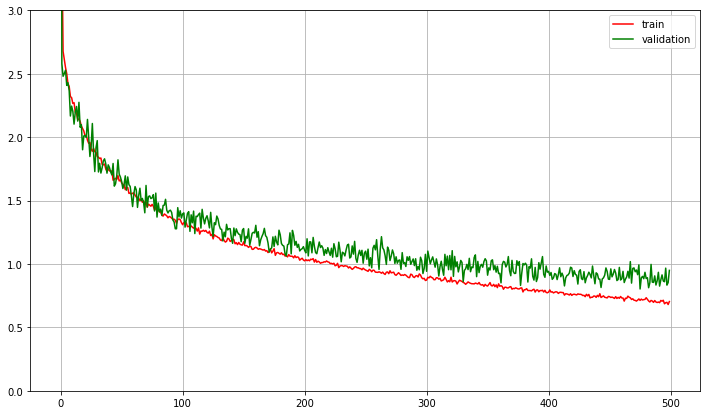

0.7039372 0.88163316
BLEU:
snli_test : (0.18965845816464535, 0.1897436984061856)
quora_test : (0.3201764992035213, 0.320211449940309)
mscoco_test : (0.11440520935817282, 0.11441024048065286)
snips : (0.01276152815993904, 0.012762905598379047)


In [79]:
build_ce_plot('snli_quora_250kit_600_600', need_bleu=True)

In [ ]:
BLEU:
snli_test : 0.19627020430670541
quora_test : 0.3170016353897438
mscoco_test : 0.11456220212453005
snips : 0.012917753761593277

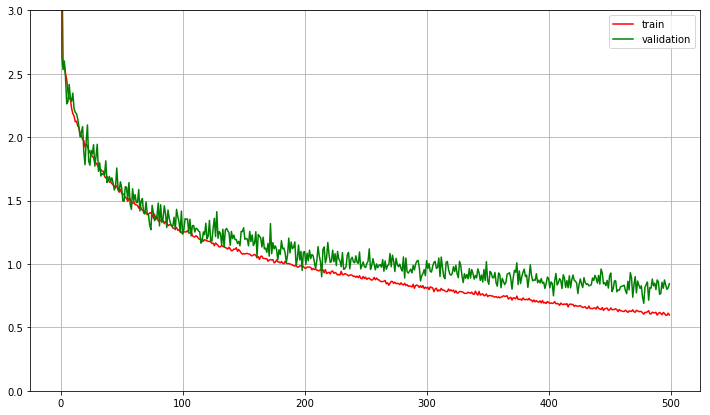

0.61075455 0.8238511
BLEU:
snli_test : (0.17637673857710517, 0.17673069067673658)
quora_test : (0.36781158771781164, 0.3678361787612327)
mscoco_test : (0.11129062604572951, 0.11129062604572951)
snips : (0.016031319006547796, 0.016035092131537507)


In [80]:
build_ce_plot('snli_quora_250kit_600_800', need_bleu=True)

In [ ]:
0.61075455 0.8238511
BLEU:
snli_test : 0.18206417433156036
quora_test : 0.3661852915415109
mscoco_test : 0.1105646896895842
snips : 0.01610874879582571

# Intermediate plots

/home/aleksey.zotov/anaconda3/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/home/aleksey.zotov/anaconda3/lib/python3.6/site-packages/nltk/translate/bleu_score.py:503: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


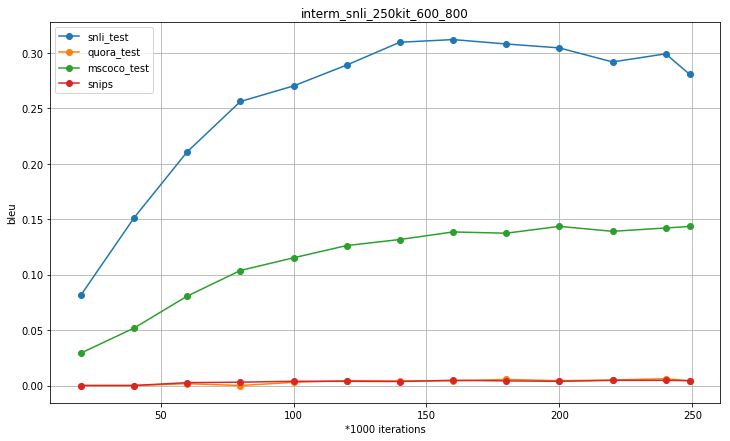

In [82]:
def interm_plots_bleu(model_name):
    def _get_bleu(model_name, it):
        result = []
        for dataset in DATASETS:
            target = np.load('logs/intermediate/target_out_{}k_{}{}.txt.npy'.format(it, dataset, model_name))
            sampled = np.load('logs/intermediate/sampled_out_{}k_{}{}.txt.npy'.format(it, dataset, model_name))
            sampled = [s.split() for s in sampled]
            target_list = [[t] for t in target]
            result.append(corpus_bleu(list_of_references=target_list, hypotheses=sampled))
        return result

    bleu_result = []
    IT_RANGE = list(range(20, 241, 20)) + [249]
    for it in IT_RANGE:
        bleu = _get_bleu(model_name, it)
        bleu_result.append(bleu)
    
    bleu_result = np.array(bleu_result).T
    plt.figure(figsize=(12,7))
    for i in range(len(DATASETS)):
        plt.plot(IT_RANGE, bleu_result[i], '-o', label=DATASETS[i])
    plt.xlabel('*1000 iterations')
    plt.ylabel('bleu')
    plt.title(model_name)
    plt.grid(True)
    plt.legend(loc='best')
        
    plt.show()
interm_plots_bleu('interm_snli_250kit_600_800')

In [17]:
! ls logs

ce_result_25kvocab160kit600decrnn.npy
ce_result_25kvocab160kit.npy
ce_result_snli_quora_160k.npy
ce_result_snli_quora_200k_800rnn.npy
ce_result_train_interm_snli_250kit_600_800.npy
ce_result_train_mscoco_300kit_600_800.npy
ce_result_train_quora_coco_200kit_600_600.npy
ce_result_train_quora_coco_250k800_800.npy
ce_result_train_quora_coco_250kit_600_800.npy
ce_result_train_quoraonly120kit600decrnn.npy
ce_result_train_snli_200k600_600.npy
ce_result_train_snli_200kit_600_800.npy
ce_result_train_snli_coco_250kit_600_800.npy
ce_result_train_snli_coco_250kit_800_800.npy
ce_result_train_snli_quora_150k_600rnn.npy
ce_result_train_snli_quora_250k_600_800rnn.npy
ce_result_train_snli_quora_250k800_1100.npy
ce_result_train_snli_quora_250kit_600_600.npy
ce_result_train_snli_quora_250kit_600_800.npy
ce_result_train_snli_quora_wd_01_200k800_800.npy
ce_result_valid_interm_snli_250kit_600_800.npy
ce_result_valid_mscoco_300kit_600_800.npy
ce_result_valid_quora_coco_200kit_600_600.npy
ce_result_valid_quor

# BLEU for Source-Target

In [27]:
import bleu

In [83]:
from nltk.translate.bleu_score import corpus_bleu, sentence_bleu
from scipy.stats import gmean
def _bleu(source, target): 
        source = [s.split() for s in source]
        target = [t.split() for t in target]

        references = [[t] for t in target]
        hypotheses = source
        
        nltk_version = corpus_bleu(list_of_references=references, hypotheses=hypotheses)
        deeppavlov_version = bleu.compute_bleu(references, hypotheses)[0]
        return nltk_version, deeppavlov_version

In [3]:
from utils.batch_loader import BatchLoader
batch_loader = BatchLoader(path='', datasets={'quora'})

QUORA: train: 134336, test: 14927
ALL: train: 134336, test: 14927
Found 27522(/29559) words with glove vectors
Vocab size : 27522


In [4]:
snips = batch_loader.get_snips()[1]
quora = batch_loader.get_nli()[1]
mscoco = batch_loader.get_mscoco()[1]
snli = batch_loader.get_quora()[1]

In [84]:
_bleu(quora['question1'], quora['question2'])

(0.1004226679770772, 0.10042444394390478)

In [85]:
_bleu(quora['question2'], quora['question1'])

(0.08411228822318705, 0.08420675203950152)

In [86]:
_bleu(mscoco['question1'], mscoco['question2'])

(0.059306560948827934, 0.059306560948827934)

In [87]:
_bleu(mscoco['question2'], mscoco['question1'])

(0.0592646397447797, 0.0592646397447797)

In [88]:
_bleu(snli['question1'], snli['question2'])

(0.28023687742960396, 0.2802800509905485)

In [89]:
_bleu(snli['question2'], snli['question1'])

(0.2803832767810841, 0.2804353691530886)

In [90]:
_bleu(snips['question1'], snips['question2'])

(0.02175451030349916, 0.02177213147410958)

In [91]:
_bleu(snips['question2'], snips['question1'])

(0.02175825273523926, 0.021775867008753426)

(0.7165313105737893, 0.7165313105737893)
(0.75, 0.75)
